In [2]:
# Import packages to be used in analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import datetime as dt
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show

Define Functions/Re-useable Code - To make dataset more manageable

In [3]:
# Print most recent and last movie in dataset

def printMostRecentMovie(df):
    df.sort_values('release_date', ascending=False, inplace=True)
    print("Most recent film in dataset is: " + df['original_title'].iloc[0] + ", released on " + str(df['release_date'].iloc[0].date()) )
    print("Least recent film in dataset is: " + df['original_title'].iloc[-1] + ", released on " + str(df['release_date'].iloc[-1].date()) )
    return

In [4]:
# Remove any rows where either the 'budget' or 'revenue' columns show a zero value

def removeInvalidRows(df):
    df.drop(df[df.budget == 0].index, inplace=True)
    df.drop(df[df.revenue == 0].index, inplace=True)
    return

In [5]:
# Remove rows where 'revenue' is less than $50,000 (potential distorting of analysis with obvious outliers) 

def removeLowRevenueFilms(df):
    df.drop(df[ df.revenue < 50000 ].index, inplace=True)
    return

In [6]:
# Remove rows where 'budget' is less than $50,000 (potential distorting of analysis with obvious outliers) 

def removeLowBudgetFilms(df):
    df.drop(df[ df.budget < 500000 ].index, inplace=True)
    return

In [7]:
# Remove any entries where the genre is 'Documentary' (Genre doesn't properly belong in dataset of 
# commercial releases)

def removeDocumentaries(df):
    df.drop(df[df.first_genre == "Documentary"].index, inplace=True)
    return

In [8]:
# Very important: All movies pre 1975 dropped (Jaws effect, see note in document)

def removePreJawsMovies(df):
    df.drop(df[df.release_year < 1975].index, inplace=True)
    return

In [9]:
# Streamline 'genre' description by taking first element of string (using Lamda functon)

def addFirstGenre(df):
    df['first_genre'] = df['genres'].apply(lambda val: val.split('|')[0])
    df['first_genre'].value_counts()
    print(martmovies['first_genre'].value_counts())
    return

In [10]:
# Drop columns with no statisticalfunction in analysis

def removeUnnecessaryColumns(df):
    df.drop(['imdb_id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj', 'vote_count'], inplace=True, axis=1)
    return

In [11]:
# Convert 'release_date' column into datetime format for better manipulation of data

def convertReleaseDate(df):
    martmovies['release_date'] = pd.to_datetime(martmovies['release_date'], infer_datetime_format=True, errors='raise')
    return

Call Movies Dataset into Pandas

In [12]:
file_url = 'https://github.com/Martmedia/UCDPA_MartinCody/blob/main/tmdb_movies_data.csv'
file_url = '/Users/martincody/Desktop/Martin Cody - Project Files 22 April 2021/tmdb_movies_data.csv'
martmovies = pd.read_csv(file_url)

Call Pre-Defined Functions

In [13]:
convertReleaseDate(martmovies)
martmovies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [14]:
removeUnnecessaryColumns(martmovies)

In [15]:
removeInvalidRows(martmovies)

In [16]:
addFirstGenre(martmovies)

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: first_genre, dtype: int64


In [17]:
removePreJawsMovies(martmovies)
removeDocumentaries(martmovies)
removeLowBudgetFilms(martmovies)
removeLowRevenueFilms(martmovies)

In [18]:
martmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 10793
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3571 non-null   int64         
 1   popularity            3571 non-null   float64       
 2   budget                3571 non-null   int64         
 3   revenue               3571 non-null   int64         
 4   original_title        3571 non-null   object        
 5   cast                  3571 non-null   object        
 6   director              3570 non-null   object        
 7   keywords              3447 non-null   object        
 8   overview              3571 non-null   object        
 9   runtime               3571 non-null   int64         
 10  genres                3571 non-null   object        
 11  production_companies  3540 non-null   object        
 12  release_date          3571 non-null   datetime64[ns]
 13  vote_average     

In [19]:
printMostRecentMovie(martmovies)

Most recent film in dataset is: Anomalisa, released on 2015-12-30
Least recent film in dataset is: Tommy, released on 1975-03-19


Plot data to Drive Insights

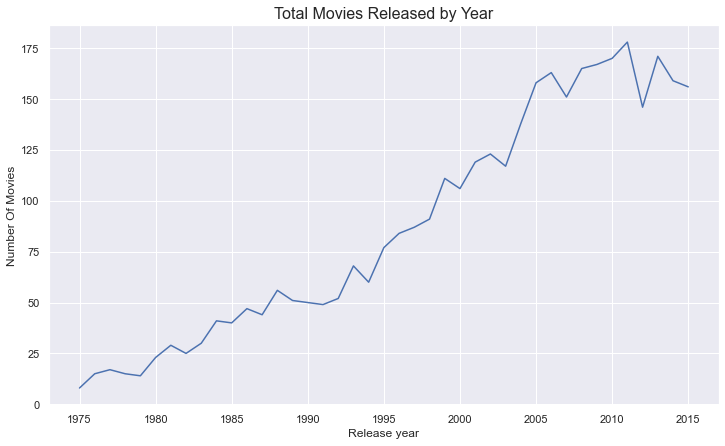

In [21]:
#Plot total movies released by year 1975-2015

datanew=martmovies.groupby('release_year').count()['id']
martmovies.groupby('release_year').count()['id'].plot(xticks = np.arange(1975,2016,5))

#Plot
sns.set(rc={'figure.figsize':(12,7)})
plt.title("Total Movies Released by Year",fontsize = 16)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)

sns.set_style("darkgrid")
plt.show()

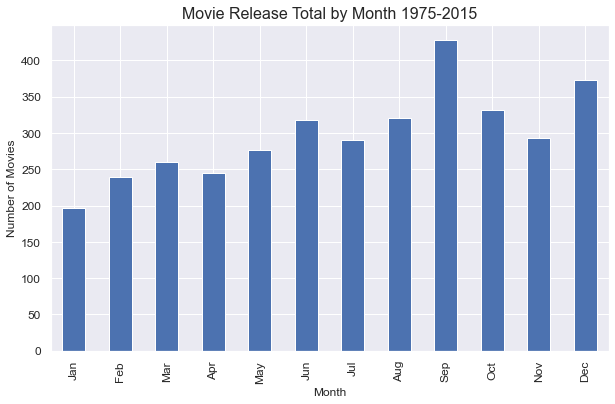

In [22]:
#Plot release pattern by month 1975-2015

#extract the month number from the release date
month_release = martmovies['release_date'].dt.month

#counttotal movies/month using value_counts().
total_mrelease = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_mrelease = pd.DataFrame(total_mrelease)
total_mrelease['month'] = months

total_mrelease.rename(columns = {'release_date':'total_mrelease'},inplace=True)

#plot 
total_mrelease.plot(x='month',kind='bar',fontsize = 12,figsize=(10,6), legend=False)

plt.title('Movie Release Total by Month 1975-2015',fontsize = 16)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Number of Movies',fontsize = 12)
sns.set_style("darkgrid")

plt.show()

Delete Selected Genre With Low Counts to Make Some Charts Easier to read

In [23]:
def removeTVmovie(df):
    df.drop(df[df.first_genre == "TV Movie"].index, inplace=True)
    return

In [24]:
def removeWestern(df):
    df.drop(df[df.first_genre == "Western"].index, inplace=True)
    return

In [25]:
def removeHistory(df):
    df.drop(df[df.first_genre == "History"].index, inplace=True)
    return

In [26]:
def removeMusic(df):
    df.drop(df[df.first_genre == "Music"].index, inplace=True)
    return

In [27]:
def removeMystery(df):
    df.drop(df[df.first_genre == "Mystery"].index, inplace=True)
    return

In [28]:
removeTVmovie(martmovies)
removeWestern(martmovies)
removeHistory(martmovies)
removeMusic(martmovies)
removeMystery(martmovies)

In [29]:
print(martmovies['first_genre'].value_counts())

Drama              826
Comedy             742
Action             651
Adventure          291
Horror             252
Crime              155
Thriller           154
Fantasy            106
Animation          100
Science Fiction     89
Romance             64
Family              38
War                 18
Name: first_genre, dtype: int64


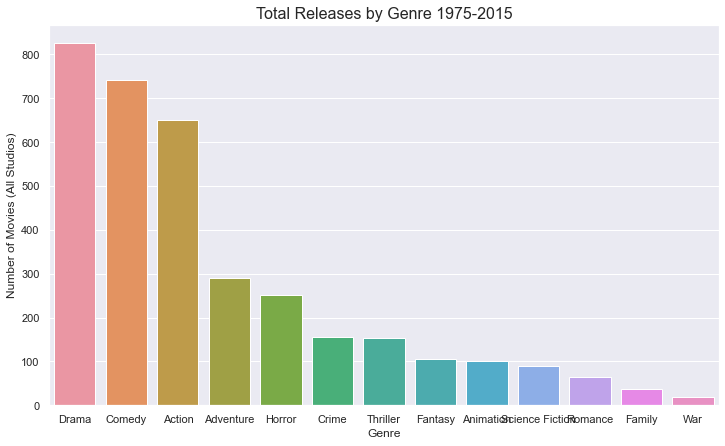

In [30]:
#Plot total releases by genre 1975-2015 (Seaborn)

order = martmovies['first_genre'].value_counts(ascending=False).index
sns.countplot(x='first_genre', data=martmovies, order=order)

plt.title("Total Releases by Genre 1975-2015",fontsize = 16)
plt.xlabel('Genre',fontsize = 12)
plt.ylabel('Number of Movies (All Studios)',fontsize = 12)

plt.show()

Add New Column 'Profitability'

In [31]:
# Add new column 'Profitability'

martmovies['Profitability'] = martmovies['revenue'] - martmovies['budget']

In [32]:
# Examine column headings to ensure new column is in place 

martmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 144 to 9824
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3486 non-null   int64         
 1   popularity            3486 non-null   float64       
 2   budget                3486 non-null   int64         
 3   revenue               3486 non-null   int64         
 4   original_title        3486 non-null   object        
 5   cast                  3486 non-null   object        
 6   director              3485 non-null   object        
 7   keywords              3363 non-null   object        
 8   overview              3486 non-null   object        
 9   runtime               3486 non-null   int64         
 10  genres                3486 non-null   object        
 11  production_companies  3455 non-null   object        
 12  release_date          3486 non-null   datetime64[ns]
 13  vote_average    

In [33]:
#Plot Genre by Profitability 1975-2015 (Seaborn)




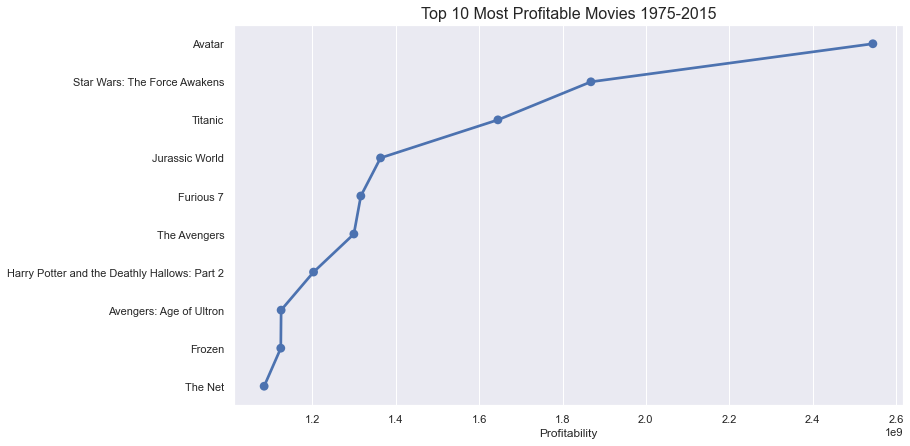

In [34]:
#Plot Top 10 Most Profitable Movies 1975-2015 (Matplotlib)

info = pd.DataFrame(martmovies['Profitability'].sort_values(ascending = False))
info['original_title'] = martmovies['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profitability'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})

ax.set_title("Top 10 Most Profitable Movies 1975-2015",fontsize = 16)
ax.set_xlabel("Profitability",fontsize = 12)
sns.set_style("whitegrid")

plt.show()

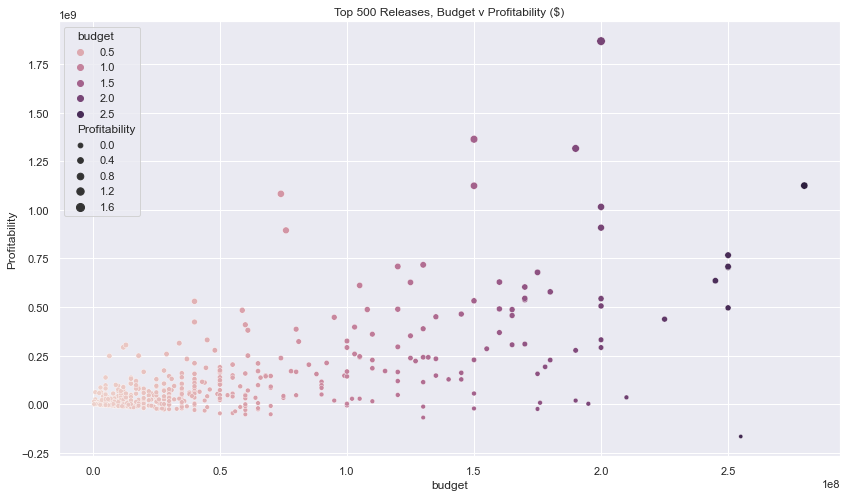

In [39]:
# Attempt to show Relationship between Budget and Actual Profit (Top 500)

fig, ax = plt.subplots (figsize=(14,8))
top_genre = martmovies [ :501]

sns.scatterplot(data=top_genre, x='budget', y='Profitability', hue='budget', size='Profitability')

sns.set_style("darkgrid")

plt.title('Top 500 Releases, Budget v Profitability ($)')
sns.set(color_codes=False)

plt.show()
                    